In [1]:
import mne
import numpy as np
import glob
from past.builtins import unicode
import xlrd
import pandas as pd

In [2]:
#读取SE训练数据
data_dir_file=r"../SE_train_processed/"
train_data_file_path=sorted(glob.glob(data_dir_file+"*"))
# data_file_path
print(len(train_data_file_path))

#读取SE测试数据
data_dir_file=r"../SE_test_processed/"
test_data_file_path=sorted(glob.glob(data_dir_file+"*"))
# data_file_path
print(len(test_data_file_path))

944
16


In [3]:
# data_file_path

In [4]:
#发作为1；未发作为0
y_train=[]
for i in train_data_file_path:
    if i.find('未发作')==-1:
        # 找不到未发作，即发作，记为1
        y_train.append(1)
    else:
        y_train.append(0)
print(len(y_train))
print(sum(y_train))

#发作为1；未发作为0
y_test=[]
for i in test_data_file_path:
    if i.find('未发作')==-1:
        # 找不到未发作，即发作，记为1
        y_test.append(1)
    else:
        y_test.append(0)
print(len(y_test))
print(sum(y_test))

944
496
16
14


In [5]:
#选择的通道数
channel_num=15
#训练集的SE切片长度
train_SE_len=16
#测试集的SE切片长度
test_SE_len=16

In [6]:
# 训练集
# 切成2s一段，不用乘通道数
y_long_data=[]
for i in y_train:
    for j in range((int)(train_SE_len/2)):
        y_long_data.append(i)
y_train=y_long_data
print(len(y_train))

7552


In [7]:
y_long_test_data=[]
for i in y_test:
    for j in range((int)(test_SE_len/2)):
        y_long_test_data.append(i)
y_test=y_long_test_data
print(len(y_test))

128


In [9]:
import scipy.signal
import scipy.io as scio   
#设定为2s一段
samps = 2

In [10]:
x_train=[]
for i in train_data_file_path:
    raw = mne.io.read_raw_fif(i)
    data,time=raw[:]
    for j in range(0,train_SE_len,samps):
        data_temp = []
        for k in range (channel_num):
            data_temp.append(data[k][j*256:(j+samps)*256])         
        x_train.append(data_temp)   

Opening raw data file ../SE_train_processed\Z何富桂20220221(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z何富桂20220221(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z何富桂20220221(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z何富桂20220221(permutation_1).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z何富桂20220221(permutation_2).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z何富桂20220221(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z何富桂20220221(scale_down

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z何富桂20220221(flip).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z何富桂20220221(jitter).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z何富桂20220221(original).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, r

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z何富桂20220221(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z何富桂20220225(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z何富桂20220225(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z何富桂20220225(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z何富桂20220225(permutation_1).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z何富桂20220225(permutation_2).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening ra

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z何富桂20220221(scale_up).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z何富桂20220225(flip).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z何富桂20220225(jitter).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, r

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z何富桂20220228(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z何富桂20220228(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z何富桂20220228(permutation_1).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z何富桂20220228(permutation_2).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z何富桂20220228(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z何富桂20220228(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z何富桂20220228(jitter).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z何富桂20220228(original).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z何富桂20220228(permutation_1).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ie

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z何富桂20220302(permutation_2).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z何富桂20220302(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z何富桂20220302(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z何富桂20220302(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z倪诗瑄20220311(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z倪诗瑄20220311(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening 

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z何富桂20220302(permutation_2).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z何富桂20220302(permutation_3).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z何富桂20220302(scale_down).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z倪诗瑄20220311(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z倪诗瑄20220314(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z倪诗瑄20220314(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z倪诗瑄20220314(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z倪诗瑄20220314(permutation_1).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z倪诗瑄20220314(permutation_2).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening ra

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z倪诗瑄20220311(scale_up).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z倪诗瑄20220314(flip).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z倪诗瑄20220314(jitter).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, r

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z倪诗瑄20220316(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z倪诗瑄20220316(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z倪诗瑄20220316(permutation_1).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z倪诗瑄20220316(permutation_2).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z倪诗瑄20220316(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z倪诗瑄20220316(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z倪诗瑄20220316(flip).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z倪诗瑄20220316(jitter).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z倪诗瑄20220316(original).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, r

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z倪诗瑄20220318(permutation_1).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z倪诗瑄20220318(permutation_2).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z倪诗瑄20220318(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z倪诗瑄20220318(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z倪诗瑄20220318(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘世清20220309(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
O

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z倪诗瑄20220318(permutation_1).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z倪诗瑄20220318(permutation_2).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z倪诗瑄20220318(permutation_3).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘世清20220309(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘世清20220309(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘世清20220311(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘世清20220311(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘世清20220311(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘世清20220311(permutation_1).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Re

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z刘世清20220309(scale_down).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z刘世清20220309(scale_up).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z刘世清20220311(flip).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fi

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘世清20220314（未发作）(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘世清20220314（未发作）(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘世清20220314（未发作）(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘世清20220314（未发作）(permutation_1).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘世清20220314（未发作）(permutation_2).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘世清20220314（未发作）(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 .

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z刘世清20220314（未发作）(flip).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z刘世清20220314（未发作）(jitter).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z刘世清20220314（未发作）(original).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fi

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘世清20220314（未发作）random_flip_13.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘世清20220314（未发作）random_flip_14.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘世清20220314（未发作）random_flip_15.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘世清20220314（未发作）random_flip_16.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘世清20220314（未发作）random_flip_17.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘世清20220314（未发作）random_flip_18.fif...
Isotrak not found
    

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z刘世清20220314（未发作）random_flip_12.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z刘世清20220314（未发作）random_flip_13.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z刘世清20220314（未发作）random_flip_14.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif,

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘世清20220314（未发作）random_flip_24.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘世清20220314（未发作）random_flip_3.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘世清20220314（未发作）random_flip_4.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘世清20220314（未发作）random_flip_5.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘世清20220314（未发作）random_flip_6.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘世清20220314（未发作）random_flip_7.fif...
Isotrak not found
    Range

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z刘世清20220314（未发作）random_flip_24.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z刘世清20220314（未发作）random_flip_3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z刘世清20220314（未发作）random_flip_4.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘世清20220316(permutation_2).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘世清20220316(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘世清20220316(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘世清20220316(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘家瑞20220225(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘家瑞20220225(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening 

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z刘世清20220316(permutation_2).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z刘世清20220316(permutation_3).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z刘世清20220316(scale_down).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg

Opening raw data file ../SE_train_processed\Z刘家瑞20220225(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘家瑞20220225(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘家瑞20220228(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘家瑞20220228(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘家瑞20220228(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘家瑞20220228(permutation_1).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘家瑞20220228(permutation_2).fif

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z刘家瑞20220225(scale_down).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z刘家瑞20220225(scale_up).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z刘家瑞20220228(flip).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fi

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘家瑞20220302(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘家瑞20220302(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘家瑞20220302(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘家瑞20220302(permutation_1).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘家瑞20220302(permutation_2).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z刘家瑞20220302(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Openi

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z刘家瑞20220302(flip).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z刘家瑞20220302(jitter).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z刘家瑞20220302(original).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, r

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z周小凯20220314（未发作）(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z周小凯20220314（未发作）(permutation_1).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z周小凯20220314（未发作）(permutation_2).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z周小凯20220314（未发作）(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z周小凯20220314（未发作）(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z周小凯20220314（未发作）(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =     

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z周小凯20220314（未发作）(original).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z周小凯20220314（未发作）(permutation_1).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z周小凯20220314（未发作）(permutation_2).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z周小凯20220314（未发作）random_flip_14.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z周小凯20220314（未发作）random_flip_15.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z周小凯20220314（未发作）random_flip_16.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z周小凯20220314（未发作）random_flip_17.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z周小凯20220314（未发作）random_flip_18.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z周小凯20220314（未发作）random_flip_19.fif...
Isotrak not found
    Range : 0 ... 4095

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z周小凯20220314（未发作）random_flip_14.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z周小凯20220314（未发作）random_flip_15.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z周小凯20220314（未发作）random_flip_16.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif,

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z周小凯20220314（未发作）random_flip_24.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z周小凯20220314（未发作）random_flip_3.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z周小凯20220314（未发作）random_flip_4.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z周小凯20220314（未发作）random_flip_5.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z周小凯20220314（未发作）random_flip_6.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z周小凯20220314（未发作）random_flip_7.fif...
Isotrak not found
    Range : 0 ... 4095 =   

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z周小凯20220314（未发作）random_flip_24.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z周小凯20220314（未发作）random_flip_3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z周小凯20220314（未发作）random_flip_4.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z周小凯20220316(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z周小凯20220316(permutation_1).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z周小凯20220316(permutation_2).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z周小凯20220316(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z周小凯20220316(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z周小凯20220316(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Read

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z周小凯20220316(original).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z周小凯20220316(permutation_1).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z周小凯20220316(permutation_2).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.f

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z周小凯20220318(permutation_2).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z周小凯20220318(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z周小凯20220318(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z周小凯20220318(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z周小凯20220321(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z周小凯20220321(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening 

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z周小凯20220318(permutation_2).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z周小凯20220318(permutation_3).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z周小凯20220318(scale_down).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z周小凯20220321(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z孙彭辉20220225(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z孙彭辉20220225(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z孙彭辉20220225(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z孙彭辉20220225(permutation_1).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z孙彭辉20220225(permutation_2).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z周小凯20220321(scale_up).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z孙彭辉20220225(flip).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z孙彭辉20220225(jitter).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, r

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z孙彭辉20220228(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z孙彭辉20220228(permutation_1).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z孙彭辉20220228(permutation_2).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z孙彭辉20220228(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z孙彭辉20220228(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z孙彭辉20220228(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Read

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z孙彭辉20220228(original).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z孙彭辉20220228(permutation_1).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z孙彭辉20220228(permutation_2).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.f

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z孙彭辉20220302(permutation_2).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z孙彭辉20220302(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z孙彭辉20220302(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z孙彭辉20220302(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z孙彭辉20220304(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z孙彭辉20220304(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening 

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z孙彭辉20220302(permutation_2).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z孙彭辉20220302(permutation_3).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z孙彭辉20220302(scale_down).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z孙彭辉20220304(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z孙彭辉20220304(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z张璐20220225(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z张璐20220225(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z张璐20220225(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z张璐20220225(permutation_1).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data 

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z孙彭辉20220304(scale_down).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z孙彭辉20220304(scale_up).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z张璐20220225(flip).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z张璐20220228(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z张璐20220228(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z张璐20220228(permutation_1).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z张璐20220228(permutation_2).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z张璐20220228(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z张璐20220228(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Openi

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z张璐20220228(jitter).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z张璐20220228(original).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z张璐20220228(permutation_1).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z张璐20220302（未发作）(permutation_2).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z张璐20220302（未发作）(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z张璐20220302（未发作）(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z张璐20220302（未发作）(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z张璐20220302（未发作）random_flip_1.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z张璐20220302（未发作）random_flip_10.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.0

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z张璐20220302（未发作）(permutation_2).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z张璐20220302（未发作）(permutation_3).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z张璐20220302（未发作）(scale_down).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _m

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z张璐20220302（未发作）random_flip_17.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z张璐20220302（未发作）random_flip_18.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z张璐20220302（未发作）random_flip_19.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z张璐20220302（未发作）random_flip_2.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z张璐20220302（未发作）random_flip_20.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z张璐20220302（未发作）random_flip_21.fif...
Isotrak not found
    Range : 0 ... 4095 =     

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z张璐20220302（未发作）random_flip_17.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z张璐20220302（未发作）random_flip_18.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z张璐20220302（未发作）random_flip_19.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _m

Ready.
Opening raw data file ../SE_train_processed\Z张璐20220302（未发作）random_flip_5.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z张璐20220302（未发作）random_flip_6.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z张璐20220302（未发作）random_flip_7.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z张璐20220302（未发作）random_flip_8.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z张璐20220302（未发作）random_flip_9.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z徐珍英20220218（未发作）(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z张璐20220302（未发作）random_flip_5.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z张璐20220302（未发作）random_flip_6.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z张璐20220302（未发作）random_flip_7.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.

Opening raw data file ../SE_train_processed\Z徐珍英20220218（未发作）(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z徐珍英20220218（未发作）(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z徐珍英20220218（未发作）(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z徐珍英20220218（未发作）random_flip_1.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z徐珍英20220218（未发作）random_flip_10.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z徐珍英20220218（未发作）random_flip_11.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z徐珍英20220218（未发作）(permutation_3).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z徐珍英20220218（未发作）(scale_down).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z徐珍英20220218（未发作）(scale_up).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg

Opening raw data file ../SE_train_processed\Z徐珍英20220218（未发作）random_flip_16.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z徐珍英20220218（未发作）random_flip_17.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z徐珍英20220218（未发作）random_flip_18.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z徐珍英20220218（未发作）random_flip_19.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z徐珍英20220218（未发作）random_flip_2.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z徐珍英20220218（未发作）random_flip_20.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file .

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z徐珍英20220218（未发作）random_flip_16.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z徐珍英20220218（未发作）random_flip_17.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z徐珍英20220218（未发作）random_flip_18.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif,

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z徐珍英20220218（未发作）random_flip_4.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z徐珍英20220218（未发作）random_flip_5.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z徐珍英20220218（未发作）random_flip_6.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z徐珍英20220218（未发作）random_flip_7.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z徐珍英20220218（未发作）random_flip_8.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z徐珍英20220218（未发作）random_flip_9.fif...
Isotrak not found
    Range 

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z徐珍英20220218（未发作）random_flip_3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z徐珍英20220218（未发作）random_flip_4.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z徐珍英20220218（未发作）random_flip_5.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _m

Ready.
Opening raw data file ../SE_train_processed\Z徐珍英20220221（未发作）(permutation_1).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z徐珍英20220221（未发作）(permutation_2).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z徐珍英20220221（未发作）(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z徐珍英20220221（未发作）(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z徐珍英20220221（未发作）(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z徐珍英20220221（未发作）random_flip_1.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data fi

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z徐珍英20220221（未发作）(permutation_1).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z徐珍英20220221（未发作）(permutation_2).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z徐珍英20220221（未发作）(permutation_3).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.f

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z徐珍英20220221（未发作）random_flip_15.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z徐珍英20220221（未发作）random_flip_16.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z徐珍英20220221（未发作）random_flip_17.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z徐珍英20220221（未发作）random_flip_18.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z徐珍英20220221（未发作）random_flip_19.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z徐珍英20220221（未发作）random_flip_2.fif...
Isotrak not found
    Range : 0 ... 4095 

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z徐珍英20220221（未发作）random_flip_15.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z徐珍英20220221（未发作）random_flip_16.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z徐珍英20220221（未发作）random_flip_17.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif,

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z徐珍英20220221（未发作）random_flip_4.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z徐珍英20220221（未发作）random_flip_5.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z徐珍英20220221（未发作）random_flip_6.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z徐珍英20220221（未发作）random_flip_7.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z徐珍英20220221（未发作）random_flip_8.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z徐珍英20220221（未发作）random_flip_9.fif...
Isotrak not found
    Range 

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z徐珍英20220221（未发作）random_flip_4.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z徐珍英20220221（未发作）random_flip_5.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z徐珍英20220221（未发作）random_flip_6.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _m

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z徐珍英20220223(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z徐珍英20220225(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z徐珍英20220225(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z徐珍英20220225(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z徐珍英20220225(permutation_1).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z徐珍英20220225(permutation_2).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening ra

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z徐珍英20220223(scale_up).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z徐珍英20220225(flip).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z徐珍英20220225(jitter).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, r

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z曾刚20220216(permutation_1).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z曾刚20220216(permutation_2).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z曾刚20220216(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z曾刚20220216(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z曾刚20220216(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z曾刚20220218（未发作）(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Op

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z曾刚20220216(permutation_1).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z曾刚20220216(permutation_2).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z曾刚20220216(permutation_3).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z曾刚20220218（未发作）(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z曾刚20220218（未发作）(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z曾刚20220218（未发作）random_flip_1.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z曾刚20220218（未发作）random_flip_10.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z曾刚20220218（未发作）random_flip_11.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z曾刚20220218（未发作）random_flip_12.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z曾刚20220218（未发作）(scale_down).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z曾刚20220218（未发作）(scale_up).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z曾刚20220218（未发作）random_flip_1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif,

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z曾刚20220218（未发作）random_flip_18.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z曾刚20220218（未发作）random_flip_19.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z曾刚20220218（未发作）random_flip_2.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z曾刚20220218（未发作）random_flip_20.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z曾刚20220218（未发作）random_flip_21.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z曾刚20220218（未发作）random_flip_22.fif...
Isotrak not found
    Range : 0 ... 4095 =     

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z曾刚20220218（未发作）random_flip_18.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z曾刚20220218（未发作）random_flip_19.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z曾刚20220218（未发作）random_flip_2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _me

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z曾刚20220218（未发作）random_flip_6.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z曾刚20220218（未发作）random_flip_7.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z曾刚20220218（未发作）random_flip_8.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z曾刚20220218（未发作）random_flip_9.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z曾刚20220221(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z曾刚20220221(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
R

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z曾刚20220218（未发作）random_flip_6.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z曾刚20220218（未发作）random_flip_7.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z曾刚20220218（未发作）random_flip_8.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z曾刚20220223(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z曾刚20220223(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z曾刚20220223(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z曾刚20220223(permutation_1).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z曾刚20220223(permutation_2).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z曾刚20220223(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z曾刚20220223(flip).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z曾刚20220223(jitter).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z曾刚20220223(original).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z杜娇20220316(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z杜娇20220316(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z杜娇20220316(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z杜娇20220318(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z杜娇20220318(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z杜娇20220318(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data fi

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z杜娇20220316(permutation_3).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z杜娇20220316(scale_down).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z杜娇20220316(scale_up).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _i

Ready.
Opening raw data file ../SE_train_processed\Z杜娇20220321(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z杜娇20220321(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z杜娇20220321(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z杜娇20220321(permutation_1).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z杜娇20220321(permutation_2).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z杜娇20220321(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z杜娇20220321(scale_down

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z杜娇20220321(flip).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z杜娇20220321(jitter).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z杜娇20220321(original).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.

Opening raw data file ../SE_train_processed\Z杜娇20220325（未发作）(permutation_2).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z杜娇20220325（未发作）(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z杜娇20220325（未发作）(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z杜娇20220325（未发作）(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z杜娇20220325（未发作）random_flip_1.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z杜娇20220325（未发作）random_flip_10.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z杜娇20220325（未发作）(permutation_2).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z杜娇20220325（未发作）(permutation_3).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z杜娇20220325（未发作）(scale_down).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _m

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z杜娇20220325（未发作）random_flip_16.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z杜娇20220325（未发作）random_flip_17.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z杜娇20220325（未发作）random_flip_18.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z杜娇20220325（未发作）random_flip_19.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z杜娇20220325（未发作）random_flip_2.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z杜娇20220325（未发作）random_flip_20.fif...
Isotrak not found
    Range : 0 ... 4095 =     

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z杜娇20220325（未发作）random_flip_16.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z杜娇20220325（未发作）random_flip_17.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z杜娇20220325（未发作）random_flip_18.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _m

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z杜娇20220325（未发作）random_flip_3.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z杜娇20220325（未发作）random_flip_4.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z杜娇20220325（未发作）random_flip_5.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z杜娇20220325（未发作）random_flip_6.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z杜娇20220325（未发作）random_flip_7.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z杜娇20220325（未发作）random_flip_8.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.00

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z杜娇20220325（未发作）random_flip_3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z杜娇20220325（未发作）random_flip_4.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z杜娇20220325（未发作）random_flip_5.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林儒波20220323（未发作）(permutation_2).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林儒波20220323（未发作）(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林儒波20220323（未发作）(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林儒波20220323（未发作）(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林儒波20220323（未发作）random_flip_1.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林儒波20220323（未发作）random_flip_10.fif...
Isotrak not found
    Range

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z林儒波20220323（未发作）(permutation_1).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z林儒波20220323（未发作）(permutation_2).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z林儒波20220323（未发作）(permutation_3).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.f

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林儒波20220323（未发作）random_flip_19.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林儒波20220323（未发作）random_flip_2.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林儒波20220323（未发作）random_flip_20.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林儒波20220323（未发作）random_flip_21.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林儒波20220323（未发作）random_flip_22.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林儒波20220323（未发作）random_flip_23.fif...
Isotrak not found
    R

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z林儒波20220323（未发作）random_flip_18.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z林儒波20220323（未发作）random_flip_19.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z林儒波20220323（未发作）random_flip_2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, 

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林儒波20220323（未发作）random_flip_9.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林儒波20220325(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林儒波20220325(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林儒波20220325(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林儒波20220325(permutation_1).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林儒波20220325(permutation_2).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Op

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z林儒波20220323（未发作）random_flip_9.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z林儒波20220325(flip).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z林儒波20220325(jitter).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _iee

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林儒波20220328（未发作）(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林儒波20220328（未发作）(permutation_1).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林儒波20220328（未发作）(permutation_2).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林儒波20220328（未发作）(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林儒波20220328（未发作）(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林儒波20220328（未发作）(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =     

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z林儒波20220328（未发作）(original).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z林儒波20220328（未发作）(permutation_1).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z林儒波20220328（未发作）(permutation_2).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _

Opening raw data file ../SE_train_processed\Z林儒波20220328（未发作）random_flip_13.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林儒波20220328（未发作）random_flip_14.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林儒波20220328（未发作）random_flip_15.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林儒波20220328（未发作）random_flip_16.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林儒波20220328（未发作）random_flip_17.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林儒波20220328（未发作）random_flip_18.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file 

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z林儒波20220328（未发作）random_flip_13.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z林儒波20220328（未发作）random_flip_14.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z林儒波20220328（未发作）random_flip_15.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif,

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林儒波20220328（未发作）random_flip_24.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林儒波20220328（未发作）random_flip_3.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林儒波20220328（未发作）random_flip_4.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林儒波20220328（未发作）random_flip_5.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林儒波20220328（未发作）random_flip_6.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林儒波20220328（未发作）random_flip_7.fif...
Isotrak not found
    Range : 0 ... 4095 =   

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z林儒波20220328（未发作）random_flip_24.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z林儒波20220328（未发作）random_flip_3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z林儒波20220328（未发作）random_flip_4.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林儒波20220330(permutation_1).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林儒波20220330(permutation_2).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林儒波20220330(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林儒波20220330(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林儒波20220330(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林攀攀20220223（未发作）(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Rea

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z林儒波20220330(permutation_1).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z林儒波20220330(permutation_2).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z林儒波20220330(permutation_3).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林攀攀20220223（未发作）random_flip_1.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林攀攀20220223（未发作）random_flip_10.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林攀攀20220223（未发作）random_flip_11.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林攀攀20220223（未发作）random_flip_12.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林攀攀20220223（未发作）random_flip_13.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林攀攀20220223（未发作）random_flip_14.fif...
Isotrak not found
    Range : 0 ... 4095 

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z林攀攀20220223（未发作）random_flip_1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z林攀攀20220223（未发作）random_flip_10.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z林攀攀20220223（未发作）random_flip_11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, 

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林攀攀20220223（未发作）random_flip_21.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林攀攀20220223（未发作）random_flip_22.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林攀攀20220223（未发作）random_flip_23.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林攀攀20220223（未发作）random_flip_24.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林攀攀20220223（未发作）random_flip_3.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林攀攀20220223（未发作）random_flip_4.fif...
Isotrak not found
    Range : 0 ... 4095 =

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z林攀攀20220223（未发作）random_flip_21.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z林攀攀20220223（未发作）random_flip_22.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z林攀攀20220223（未发作）random_flip_23.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif,

Opening raw data file ../SE_train_processed\Z林攀攀20220225（未发作）(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林攀攀20220225（未发作）(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林攀攀20220225（未发作）(permutation_1).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林攀攀20220225（未发作）(permutation_2).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林攀攀20220225（未发作）(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林攀攀20220225（未发作）(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_tra

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z林攀攀20220225（未发作）(jitter).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z林攀攀20220225（未发作）(original).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z林攀攀20220225（未发作）(permutation_1).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林攀攀20220225（未发作）random_flip_13.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林攀攀20220225（未发作）random_flip_14.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林攀攀20220225（未发作）random_flip_15.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林攀攀20220225（未发作）random_flip_16.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林攀攀20220225（未发作）random_flip_17.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林攀攀20220225（未发作）random_flip_18.fif...
Isotrak not found
    Range : 0 ... 4095

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z林攀攀20220225（未发作）random_flip_13.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z林攀攀20220225（未发作）random_flip_14.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z林攀攀20220225（未发作）random_flip_15.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif,

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林攀攀20220225（未发作）random_flip_22.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林攀攀20220225（未发作）random_flip_23.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林攀攀20220225（未发作）random_flip_24.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林攀攀20220225（未发作）random_flip_3.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林攀攀20220225（未发作）random_flip_4.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林攀攀20220225（未发作）random_flip_5.fif...
Isotrak not found
    Range : 0 ... 4095 = 

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z林攀攀20220225（未发作）random_flip_22.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z林攀攀20220225（未发作）random_flip_23.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z林攀攀20220225（未发作）random_flip_24.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif,

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林攀攀20220228(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林攀攀20220228(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林攀攀20220228(permutation_1).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林攀攀20220228(permutation_2).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林攀攀20220228(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z林攀攀20220228(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z林攀攀20220228(jitter).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z林攀攀20220228(original).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z林攀攀20220228(permutation_1).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ie

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z王宜凡20220318(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z王宜凡20220318(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z王宜凡20220318(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z王宜凡20220321(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z王宜凡20220321(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z王宜凡20220321(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw d

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z王宜凡20220318(permutation_3).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z王宜凡20220318(scale_down).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z王宜凡20220318(scale_up).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif,

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z王宜凡20220323(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z王宜凡20220323(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z王宜凡20220323(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z王宜凡20220323(permutation_1).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z王宜凡20220323(permutation_2).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z王宜凡20220323(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Openi

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z王宜凡20220323(flip).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z王宜凡20220323(jitter).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z王宜凡20220323(original).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, r

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z王宜凡20220325(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z王宜凡20220325(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z王宜凡20220325(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z王纯刚20220321(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z王纯刚20220321(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z王纯刚20220321(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw d

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z王宜凡20220325(permutation_3).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z王宜凡20220325(scale_down).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z王宜凡20220325(scale_up).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif,

Ready.
Opening raw data file ../SE_train_processed\Z王纯刚20220323(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z王纯刚20220323(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z王纯刚20220323(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z王纯刚20220323(permutation_1).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z王纯刚20220323(permutation_2).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z王纯刚20220323(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z王纯刚20220323(sca

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z王纯刚20220323(flip).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z王纯刚20220323(jitter).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z王纯刚20220323(original).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, r

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z王纯刚20220325(permutation_2).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z王纯刚20220325(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z王纯刚20220325(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z王纯刚20220325(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z王纯刚20220328(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z王纯刚20220328(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening 

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z王纯刚20220325(permutation_2).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z王纯刚20220325(permutation_3).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z王纯刚20220325(scale_down).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖星星20220325(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖星星20220325(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖星星20220325(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖星星20220325(permutation_1).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖星星20220325(permutation_2).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖星星20220325(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Openi

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z肖星星20220325(flip).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z肖星星20220325(jitter).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z肖星星20220325(original).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, r

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖星星20220328(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖星星20220328(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖星星20220328(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖星星20220330（未发作）(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖星星20220330（未发作）(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖星星20220330（未发作）(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z肖星星20220328(permutation_3).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z肖星星20220328(scale_down).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z肖星星20220328(scale_up).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif,

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖星星20220330（未发作）random_flip_1.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖星星20220330（未发作）random_flip_10.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖星星20220330（未发作）random_flip_11.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖星星20220330（未发作）random_flip_12.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖星星20220330（未发作）random_flip_13.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖星星20220330（未发作）random_flip_14.fif...
Isotrak not found
    Range : 0 ... 4095 

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z肖星星20220330（未发作）random_flip_1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z肖星星20220330（未发作）random_flip_10.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z肖星星20220330（未发作）random_flip_11.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, 

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖星星20220330（未发作）random_flip_19.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖星星20220330（未发作）random_flip_2.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖星星20220330（未发作）random_flip_20.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖星星20220330（未发作）random_flip_21.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖星星20220330（未发作）random_flip_22.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖星星20220330（未发作）random_flip_23.fif...
Isotrak not found
    Range : 0 ... 4095 

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z肖星星20220330（未发作）random_flip_19.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z肖星星20220330（未发作）random_flip_2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z肖星星20220330（未发作）random_flip_20.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, 

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖星星20220330（未发作）random_flip_6.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖星星20220330（未发作）random_flip_7.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖星星20220330（未发作）random_flip_8.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖星星20220330（未发作）random_flip_9.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖星星20220401(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖星星20220401(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z肖星星20220330（未发作）random_flip_6.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z肖星星20220330（未发作）random_flip_7.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z肖星星20220330（未发作）random_flip_8.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _m

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖星星20220401(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖智华20220225（未发作）(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖智华20220225（未发作）(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖智华20220225（未发作）(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖智华20220225（未发作）(permutation_1).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖智华20220225（未发作）(permutation_2).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.9

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z肖星星20220401(scale_up).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z肖智华20220225（未发作）(flip).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z肖智华20220225（未发作）(jitter).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _i

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖智华20220225（未发作）random_flip_12.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖智华20220225（未发作）random_flip_13.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖智华20220225（未发作）random_flip_14.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖智华20220225（未发作）random_flip_15.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖智华20220225（未发作）random_flip_16.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖智华20220225（未发作）random_flip_17.fif...
Isotrak not found
    Range : 0 ... 4095

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z肖智华20220225（未发作）random_flip_12.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z肖智华20220225（未发作）random_flip_13.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z肖智华20220225（未发作）random_flip_14.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif,

Opening raw data file ../SE_train_processed\Z肖智华20220225（未发作）random_flip_3.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖智华20220225（未发作）random_flip_4.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖智华20220225（未发作）random_flip_5.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖智华20220225（未发作）random_flip_6.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖智华20220225（未发作）random_flip_7.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖智华20220225（未发作）random_flip_8.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z肖智华20220225（未发作）random_flip_3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z肖智华20220225（未发作）random_flip_4.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z肖智华20220225（未发作）random_flip_5.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _m

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖智华20220228(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖智华20220302(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖智华20220302(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖智华20220302(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖智华20220302(permutation_1).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z肖智华20220302(permutation_2).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening ra

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z肖智华20220228(scale_up).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z肖智华20220302(flip).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z肖智华20220302(jitter).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, r

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z雷振20220321(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z雷振20220321(permutation_1).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z雷振20220321(permutation_2).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z雷振20220321(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z雷振20220321(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z雷振20220321(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Ope

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z雷振20220321(original).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z雷振20220321(permutation_1).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z雷振20220321(permutation_2).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif,

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z雷振20220323(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z雷振20220323(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z雷振20220323(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z雷振20220325(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z雷振20220325(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z雷振20220325(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data fi

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z雷振20220323(permutation_3).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z雷振20220323(scale_down).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z雷振20220323(scale_up).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _i

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z雷振20220328(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z雷振20220328(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z雷振20220328(permutation_1).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z雷振20220328(permutation_2).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z雷振20220328(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z雷振20220328(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Openi

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z雷振20220328(jitter).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z雷振20220328(original).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z雷振20220328(permutation_1).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄盈雪20220314(permutation_2).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄盈雪20220314(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄盈雪20220314(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄盈雪20220314(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄盈雪20220316(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄盈雪20220316(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening 

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z黄盈雪20220314(permutation_2).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z黄盈雪20220314(permutation_3).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z黄盈雪20220314(scale_down).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄盈雪20220318(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄盈雪20220318(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄盈雪20220318(permutation_1).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄盈雪20220318(permutation_2).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄盈雪20220318(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄盈雪20220318(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z黄盈雪20220318(flip).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z黄盈雪20220318(jitter).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z黄盈雪20220318(original).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, r

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄盈雪20220323（未发作）(permutation_2).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄盈雪20220323（未发作）(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄盈雪20220323（未发作）(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄盈雪20220323（未发作）(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄盈雪20220323（未发作）random_flip_1.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄盈雪20220323（未发作）random_flip_10.fif...
Isotrak not found
    Range : 0 ... 4095 =   

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z黄盈雪20220323（未发作）(permutation_2).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z黄盈雪20220323（未发作）(permutation_3).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z黄盈雪20220323（未发作）(scale_down).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif,

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄盈雪20220323（未发作）random_flip_16.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄盈雪20220323（未发作）random_flip_17.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄盈雪20220323（未发作）random_flip_18.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄盈雪20220323（未发作）random_flip_19.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄盈雪20220323（未发作）random_flip_2.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄盈雪20220323（未发作）random_flip_20.fif...
Isotrak not found
    Range : 0 ... 4095 

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z黄盈雪20220323（未发作）random_flip_16.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z黄盈雪20220323（未发作）random_flip_17.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z黄盈雪20220323（未发作）random_flip_18.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif,

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄盈雪20220323（未发作）random_flip_3.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄盈雪20220323（未发作）random_flip_4.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄盈雪20220323（未发作）random_flip_5.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄盈雪20220323（未发作）random_flip_6.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄盈雪20220323（未发作）random_flip_7.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄盈雪20220323（未发作）random_flip_8.fif...
Isotrak not found
    Range : 0 ... 4095 =    

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z黄盈雪20220323（未发作）random_flip_3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z黄盈雪20220323（未发作）random_flip_4.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z黄盈雪20220323（未发作）random_flip_5.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _m

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄金燕20220309(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄金燕20220309(permutation_1).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄金燕20220309(permutation_2).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄金燕20220309(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄金燕20220309(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄金燕20220309(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Read

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z黄金燕20220309(original).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z黄金燕20220309(permutation_1).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z黄金燕20220309(permutation_2).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.f

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄金燕20220311(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄金燕20220311(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄金燕20220314(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄金燕20220314(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄金燕20220314(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄金燕20220314(permutation_1).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw d

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z黄金燕20220311(scale_down).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z黄金燕20220311(scale_up).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z黄金燕20220314(flip).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fi

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄金燕20220316(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄金燕20220316(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z黄金燕20220316(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z齐金钢20220223(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z齐金钢20220223(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z齐金钢20220223(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw d

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z黄金燕20220316(permutation_3).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z黄金燕20220316(scale_down).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z黄金燕20220316(scale_up).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif,

    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z齐金钢20220225(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z齐金钢20220225(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z齐金钢20220225(permutation_1).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z齐金钢20220225(permutation_2).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z齐金钢20220225(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z齐金钢20220225(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z齐金钢20220225(jitter).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z齐金钢20220225(original).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z齐金钢20220225(permutation_1).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ie

Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z齐金钢20220228(permutation_3).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z齐金钢20220228(scale_down).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z齐金钢20220228(scale_up).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z齐金钢20220302(flip).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z齐金钢20220302(jitter).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_train_processed\Z齐金钢20220302(original).fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Re

<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z齐金钢20220228(permutation_2).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z齐金钢20220228(permutation_3).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-10-73414d3b7bc9>:3: RuntimeWarning: This filename (../SE_train_processed\Z齐金钢20220228(scale_down).fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg

In [12]:
x_train=np.array(x_train)
x_train.shape

(7552, 15, 512)

In [13]:
x_test=[]
for i in test_data_file_path:
    raw = mne.io.read_raw_fif(i)
    data,time=raw[:]
    for j in range(0,test_SE_len,samps):
        data_temp = []
        for k in range (channel_num):
            data_temp.append(data[k][j*256:(j+samps)*256])         
        x_test.append(data_temp)  

Opening raw data file ../SE_test_processed\Z宋志辉20220318.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\Z宋志辉20220321.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\Z宋志辉20220323.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\Z宋志辉20220325.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\Z李玉萍20220216.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\Z李玉萍20220218.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\Z李玉萍20220221（未发作）.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
R

<ipython-input-13-eb210fb7e126>:3: RuntimeWarning: This filename (../SE_test_processed\Z宋志辉20220318.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-13-eb210fb7e126>:3: RuntimeWarning: This filename (../SE_test_processed\Z宋志辉20220321.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-13-eb210fb7e126>:3: RuntimeWarning: This filename (../SE_test_processed\Z宋志辉20220323.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, 

Opening raw data file ../SE_test_processed\Z沈伟20220316.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\Z沈伟20220318.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\Z赵丽兰20220225.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\Z赵丽兰20220228.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\Z赵丽兰20220302.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.
Opening raw data file ../SE_test_processed\Z赵丽兰20220304.fif...
Isotrak not found
    Range : 0 ... 4095 =      0.000 ...    15.996 secs
Ready.


<ipython-input-13-eb210fb7e126>:3: RuntimeWarning: This filename (../SE_test_processed\Z沈伟20220316.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-13-eb210fb7e126>:3: RuntimeWarning: This filename (../SE_test_processed\Z沈伟20220318.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(i)
<ipython-input-13-eb210fb7e126>:3: RuntimeWarning: This filename (../SE_test_processed\Z赵丽兰20220225.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, ra

In [14]:
x_test=np.array(x_test)
x_test.shape

(128, 15, 512)

In [15]:
path = "../SE_parameter/train_matched_stimulate_parameter.xlsx"
df_train = pd.read_excel(path,engine='openpyxl')
df_train=df_train.drop(['Unnamed: 0'],axis=1)
df_train

,parameter
0,1
1,1
2,1
3,1
4,1
...,...
939,3
940,3
941,3
942,3


In [16]:
path = "../SE_parameter/test_matched_stimulate_parameter.xlsx"
df_test = pd.read_excel(path,engine='openpyxl')
df_test=df_test.drop(['Unnamed: 0'],axis=1)
df_test

,parameter
0,3
1,2
2,1
3,4
4,3
5,1
6,4
7,2
8,4
9,1


In [17]:
# 引入刺激参数
ECT_code = []

for i in range(df_train.shape[0]):
    if df_train.iloc[i,0] == 1:
        ECT_code.append([0,0])
    if df_train.iloc[i,0] == 2:
        ECT_code.append([0,1])
    if df_train.iloc[i,0] == 3:
        ECT_code.append([1,0])
    if df_train.iloc[i,0] == 4:
        ECT_code.append([1,1])

ECT_code = np.array(ECT_code)
#不再乘通道
long_ECT_code = [i for i in ECT_code for k in range((int)(train_SE_len/2))]
long_ECT_code = np.array(long_ECT_code)
long_ECT_code.shape

(7552, 2)

In [18]:
# 引入刺激参数
test_ECT_code = []

for i in range(df_test.shape[0]):
    if df_test.iloc[i,0] == 1:
        test_ECT_code.append([0,0])
    if df_test.iloc[i,0] == 2:
        test_ECT_code.append([0,1])
    if df_test.iloc[i,0] == 3:
        test_ECT_code.append([1,0])
    if df_test.iloc[i,0] == 4:
        test_ECT_code.append([1,1])

test_ECT_code = np.array(test_ECT_code)
#改成了15通道
long_ECT_code_test = [i for i in test_ECT_code for k in range((int)(test_SE_len/2))]
long_ECT_code_test = np.array(long_ECT_code_test)
long_ECT_code_test.shape

(128, 2)

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten,Concatenate
from tensorflow.keras.layers import Conv1D, MaxPooling1D

In [22]:

# 每次都要记得更改输入的shape
#input1->conv1->pool1->conv2->pool2->conv3->pool3->flatten->dense1->dense2->concatenate->dense3->out
input1=tf.keras.layers.Input(shape=(15,512,1))#15通道2s数据
input2=tf.keras.layers.Input(shape=(2,))#刺激参数

conv1=tf.keras.layers.Conv2D(64,5,padding='same',activation='relu')(input1)
pool1=tf.keras.layers.AveragePooling2D(pool_size=(2,2),strides=(2,2),padding='same')(conv1)#64*256

conv2=tf.keras.layers.Conv2D(32,5,padding='same',activation='relu')(pool1)
pool2=tf.keras.layers.AveragePooling2D(pool_size=(2,2),strides=(2,2),padding='same')(conv2)#32*128

conv3=tf.keras.layers.Conv2D(16,3,padding='same',activation='relu')(pool2)
pool3=tf.keras.layers.AveragePooling2D(pool_size=(2,2),strides=(2,2),padding='same')(conv3)#16*64

flatten1=tf.keras.layers.Flatten()(pool3)

dense1=tf.keras.layers.Dense(256,activation='relu')(flatten1)
drop1=tf.keras.layers.Dropout(0.3)(dense1)
dense2=tf.keras.layers.Dense(64,activation='relu')(drop1)
drop2=tf.keras.layers.Dropout(0.1)(dense2)

# dense3=tf.keras.layers.Dense(20,activation='relu')(input2)
# dense4=tf.keras.layers.Dense(10,activation='relu')(dense3)

concatenate1=tf.keras.layers.Concatenate()([drop2,input2])

dense5=tf.keras.layers.Dense(20,activation='sigmoid')(concatenate1)
# dense3 = tf.keras.layers.Dense(20,activation='relu')(dense2)
out=tf.keras.layers.Dense(1,activation='sigmoid')(dense5)

# model=tf.keras.models.Model(inputs=input1,outputs=out)
model=tf.keras.models.Model(inputs=[input1,input2],outputs=out)

In [23]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 15, 512, 1)] 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 15, 512, 64)  1664        input_3[0][0]                    
__________________________________________________________________________________________________
average_pooling2d (AveragePooli (None, 8, 256, 64)   0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 8, 256, 32)   51232       average_pooling2d[0][0]          
______________________________________________________________________________________________

In [24]:
# tf.keras.utils.plot_model(model, to_file="../img/model.png",show_shapes=True)

In [25]:
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss='mse',  # 损失均方误差
              optimizer=adam,  # 优化器
              metrics='accuracy'
             )

C:\Users\dell\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [26]:
x_train=np.array(x_train)
y_train=np.array(y_train)#方便实用validation_split
long_ECT_code = np.array(long_ECT_code)

In [27]:
#方便命名模型
my_epochs=40
my_batch_size=16
my_validation_split=0.2
history = model.fit([x_train,long_ECT_code], y_train, 
                    batch_size = my_batch_size,
                    epochs = my_epochs,
                    verbose = 1,
                    validation_split = my_validation_split
                   )

Epoch 1/40
378/378 [==============================] - 74s 194ms/step - loss: 0.2153 - accuracy: 0.6838 - val_loss: 0.2291 - val_accuracy: 0.6519
Epoch 2/40
378/378 [==============================] - 78s 207ms/step - loss: 0.0996 - accuracy: 0.8691 - val_loss: 0.1689 - val_accuracy: 0.7631
Epoch 3/40
378/378 [==============================] - 81s 215ms/step - loss: 0.0637 - accuracy: 0.9215 - val_loss: 0.1549 - val_accuracy: 0.7922
Epoch 4/40
378/378 [==============================] - 84s 223ms/step - loss: 0.0499 - accuracy: 0.9409 - val_loss: 0.1562 - val_accuracy: 0.7803
Epoch 5/40
378/378 [==============================] - 86s 229ms/step - loss: 0.0403 - accuracy: 0.9527 - val_loss: 0.1591 - val_accuracy: 0.7809
Epoch 6/40
378/378 [==============================] - 81s 215ms/step - loss: 0.0344 - accuracy: 0.9601 - val_loss: 0.1928 - val_accuracy: 0.7240
Epoch 7/40
378/378 [==============================] - 78s 206ms/step - loss: 0.0288 - accuracy: 0.9649 - val_loss: 0.1626 - val_ac

In [28]:
# print(x_train.shape)
# print(y_train.shape)

In [29]:
loss_,acc_ = model.evaluate([x_train,long_ECT_code],y_train)

236/236 [==============================] - 21s 87ms/step - loss: 0.0354 - accuracy: 0.9596


In [30]:
x_test=np.array(x_test)
y_test=np.array(y_test)#方便实用validation_split
long_ECT_code_test = np.array(long_ECT_code_test)
loss_,acc_ = model.evaluate([x_test,long_ECT_code_test],y_test)

4/4 [==============================] - 0s 84ms/step - loss: 0.2151 - accuracy: 0.7656


In [31]:
acc = history.history['accuracy']
val_acc=history.history['val_accuracy']
loss = history.history['loss']
val_loss=history.history['val_loss']
epochs = range(1, len(acc) + 1)

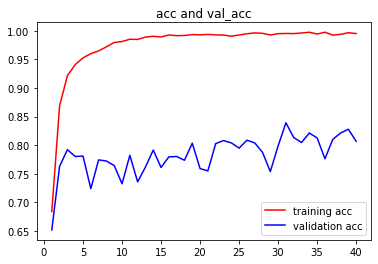

In [32]:
import matplotlib.pyplot as plt
plt.title('acc and val_acc')
plt.plot(epochs, acc, 'red', label='training acc')
plt.plot(epochs, val_acc, 'blue', label='validation acc')
plt.legend()#显示左上角的图例
plt.savefig("../img/Accuracy_ECT_16S.jpg")
plt.show()

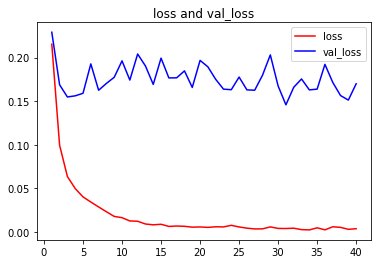

In [33]:
plt.title('loss and val_loss')
plt.plot(epochs, loss, 'red', label='loss')
plt.plot(epochs, val_loss, 'blue', label='val_loss')
plt.legend()
plt.savefig("../img/Loss_ECT_16S.jpg")
plt.show()

In [34]:
model.save('../model_save/'+model.name + "_ECT+16s_"+str(my_batch_size) + '_'+str(my_epochs)+'_'+str(my_validation_split)
           +'_'+str(acc_)[:8] + "_.h5")

In [ ]:
loaded_model = tf.keras.models.load_model('../model_save/model_1_ECT+16s_40_0.7524510025978088_.h5')

In [31]:
loss_,acc_ = loaded_model.evaluate([x_test,long_ECT_code_test],y_test)

60/60 [==============================] - 0s 6ms/step - loss: 0.2166 - accuracy: 0.7703


In [32]:
loss_,acc_ = loaded_model.evaluate([x_train,long_ECT_code],y_train)

443/443 [==============================] - 3s 7ms/step - loss: 0.4509 - accuracy: 0.5385
